# **Kaggle HW5: [AJK]**

**Remember to write your team name above, which MUST match your team name on Kaggle!!** Assignments without a team name will receive a 0/40 on the "accuracy on test data" component of this assignment's grade.

### **Load the Data**

In [ ]:
# This cell is necessary only if you are running on Google Colab. It downloads the files to your
# Colab instance so you don't have to upload them here.

import requests

def save_file(url, file_name):
    r = requests.get(url)
    with open(file_name, 'wb') as f:
      f.write(r.content)

save_file('https://courses.cs.washington.edu/courses/cse416/23sp/homeworks/hw5/edx_train.csv',
          'edx_train.csv')
save_file('https://courses.cs.washington.edu/courses/cse416/23sp/homeworks/hw5/edx_test.csv',
          'edx_test.csv')

### **Sample Code: Random Classifier**

**NOTE**: This classifier **DOES NOT** count as one of the 2 required for this assignment! It is merely here to illstrate how to submit your predictions.

See the Kaggle assignment (Data tab) for a description of each column in the dataset. You are creating a classifier to predict whether or not a student will get certified, stored in the `"certified"` column.

In [ ]:
import pandas as pd
from sklearn.dummy import DummyClassifier

target = "certified" # target column

# This classifier returns labels sampled uniformly at random
df_train = pd.read_csv('edx_train.csv')
dummy_model = DummyClassifier(strategy="uniform")
dummy_model.fit(df_train.drop(target, axis=1), df_train[target])

DummyClassifier(strategy='uniform')

The code below generates predictions on the test set, and outputs the predictions into a CSV file.

In [ ]:
# Generate predictions on the test set
df_test = pd.read_csv('edx_test.csv')
predictions = dummy_model.predict(df_test)

# Save your predictions as a CSV
to_save = df_test[['userid_DI']].copy()
to_save.loc[:, 'certified'] = predictions
to_save.to_csv('submission.csv', index=False)

# See below for instructions on how to upload submission.csv to Kaggle,
# in order to evaluate your model and get points.

### **[5 Pts] Model Comparison**

**Instructions**: Run at least 2 different classification models. The classification models we have learned in class are: [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [k-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Random Forests](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), and [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), [Neural Networks](https://scikit-learn.org/stable/modules/neural_networks_supervised.html). For each model, try at least 2 different hyperparameter settings.

Then, make one or more visualizations that let you compare the models you trained. Sample visualizations you can make include confusion matrices, or graphs of train and validation accuracy/error. See past section and homework code for how to make these visualizations.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
student_info = pd.read_csv('edx_train.csv')
print(student_info.head())

                    course_id       userid_DI  registered  viewed  explored  \
0         HarvardX/CS50x/2012  MHxPC130545492           1       1         1   
1  HarvardX/ER22x/2013_Spring  MHxPC130536944           1       1         1   
2         HarvardX/CS50x/2012  MHxPC130442298           1       1         1   
3  HarvardX/ER22x/2013_Spring  MHxPC130273564           1       1         1   
4         HarvardX/CS50x/2012  MHxPC130247761           1       1         0   

   certified final_cc_cname_DI      LoE_DI     YoB gender start_time_DI  \
0          1     United States    Master's  1984.0      m       3/10/13   
1          1    United Kingdom    Master's  1985.0      f       3/13/13   
2          1             India         NaN     NaN    NaN        8/2/12   
3          1    United Kingdom  Bachelor's  1982.0      m       1/23/13   
4          0     United States   Secondary  1989.0      m        3/5/13   

  last_event_DI  nevents  ndays_act  nplay_video  nchapters  nforum_posts 

Decision Tree Accuracy: 0.9560502283105022
Random Forest Accuracy: 0.968607305936073


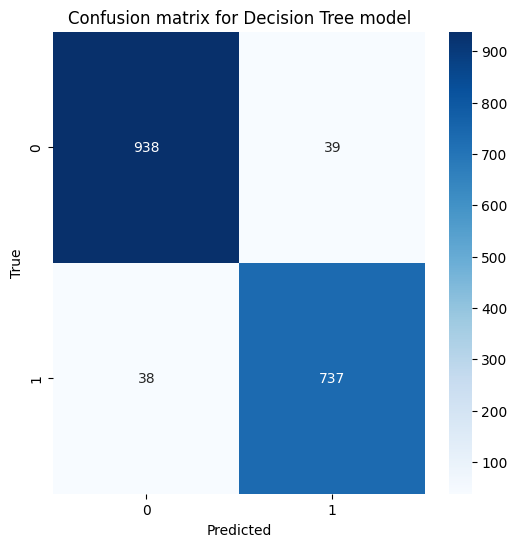

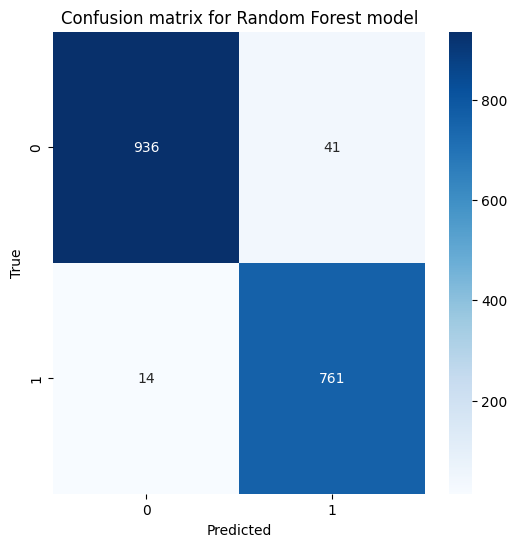

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

features = ['course_id', 'explored',
                 'final_cc_cname_DI', 'LoE_DI', 'gender',
                 'nevents', 'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts']

df_train = pd.read_csv('edx_train.csv')
df_test = pd.read_csv('edx_test.csv')
original_test = pd.read_csv('edx_test.csv')

target = "certified"

values = {"LoE_DI": "NA",
          "gender": "NA",
          "nevents": 0,
         "ndays_act": 0,
         "nplay_video": 0,
         "nchapters": 0,}

df_train = df_train.fillna(value=values)
df_test = df_test.fillna(value=values)

df_train = df_train[features + ["certified"]]
df_test = df_test[features]

X_train_full = df_train.drop(target, axis=1)
y_train_full = df_train[target]

categorical_columns = [col for col in X_train_full.columns if X_train_full[col].dtype == 'object']

df_train_encoded = pd.get_dummies(df_train, columns=categorical_columns)
df_test_encoded = pd.get_dummies(df_test, columns=categorical_columns)

df_test_encoded = df_test_encoded.reindex(columns=df_train_encoded.columns, fill_value=0)

X_train = df_train_encoded.drop(target, axis=1)
X_test = df_test_encoded.drop(target, axis=1, errors='ignore')

X_test = X_test.fillna(X_train.median())

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_full, test_size=0.2, random_state=42)

numerical_columns = ['nevents', 'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts']

scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


decision_tree_params = {
    'max_depth': 10,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'criterion': 'gini',
}

decision_tree_model = DecisionTreeClassifier(random_state=42, **decision_tree_params)
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_val)

print("Decision Tree Accuracy:", accuracy_score(y_val, decision_tree_predictions))

random_forest_params = {
    'n_estimators': 100,
    'max_depth': 30,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
}

random_forest_model = RandomForestClassifier(random_state=42, **random_forest_params)
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_val)

print("Random Forest Accuracy:", accuracy_score(y_val, random_forest_predictions))

dt_cm = confusion_matrix(y_val, decision_tree_predictions)
rf_cm = confusion_matrix(y_val, random_forest_predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix for Decision Tree model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix for Random Forest model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

test_predictions_random_forest = random_forest_model.predict(X_test)
test_predictions_decision_tree = decision_tree_model.predict(X_test)

to_save = original_test[['userid_DI']].copy()
to_save['certified'] = test_predictions_random_forest
to_save.to_csv('submission.csv', index=False)


**Remember to submit your submissions CSV FILE on Kaggle!** 40 pts come from your accuracy on the private test data.

Attend section on Thurs 5/11 for a demo of how to uppload submissions to Kaggle. We also have screenshots below (ingore summer and homework number in pictures)

Step 1: See the list of files on Colab

![See Colab Files](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/1_colab_see_files.jpg)

Step 2: Download `submission.csv`

![Download Colab File](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/2_colab_download_file.jpg)

Step 3: Join the Kaggle competition.

![Join the Kaggle Competition](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/3_kaggle_join_competition.jpg)

Step 4: Enusre your team name in Kaggle matches the one at the top of this notebook!

![Check Team Name](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/4_kaggle_team_name.jpg)

Step 5: Upload `submission.csv` to Kaggle

![Upload submission.csv](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/6_kaggle_upload_submission.jpg)



### **Discussion**



#### **[7 Pts] Training the Models**

**Instructions**: Discuss what models you tried, and what you did to improve your initial predictions. Discuss what hyperparameters you tried, and which hyperparameters seemed important for your final model. Finally, discuss what you are inferring from the above visualiation(s).

For our two models, we chose to use the random forest classifier and decision tree classifier. We first split the data into training and validation sets and used one-hot encoding via get_dummies to convert categorical variables into numerical features. We then scaled the numerical features. Initially, the accuracy scores for both models were in the 60% to 70% range. To improve the models and achieve an accuracy of 95% or above, we tuned the hyperparameters for each model iteratively until we reached our desired performance. The final hyperparameters for the decision tree model were: max_depth=10, min_samples_split=5, min_samples_leaf=2, criterion=’gini’. The final hyperparameters for the random forest modell were: n_estimators=100, max_depth=30, min_samples_split-5, min_samples_leaf=2, and max_features=’sqrt’. We trained the models on the training data and evaluated their performance using confusion matrices. For the Decision Tree model: 938 represented true negatives, 38 false negatives, 39 false positives and 737 true positives. For the Random Forest model: we got 936 true negatives, 14 false negatives, 41 false positives, and 761 true negatives. The Random Forest model demonstrated slightly better performance, with a higher number of true positives and fewer false negatives compared to the Decision Tree model.


#### **[3 Pts] Feature Selection**

**Instructions**: Discuss what features you used and whether you did some transformations on them. What features seemed important for your final model?

Features used: course_id, explored, final_cc_cname_DI, LoE_DI, gender, nevents, ndays_act, nplay_video, nchapters, and nforum_posts.

The categorical features: course_id, explored, final_cc_cname_DI, LoE_DI, gender went through transformation through one-hot encoding. It turned them into a numerical value.

The numerical features: nevents, ndays_act, nplay_video, nchapters, nforum_posts were standardized using StandardScaler, which takes the mean of zero and the standard deviation of one.

The missing values were turned into zero.

Key features: nevents, ndays_act, nplay_video, nchapters, and nforum_posts seemed important for the final model since it showed student activity.

#### **[5 Pts] Ethical Implications**

**Instructions**: Consider and discuss the ethical implications of using the model you trained. Imagine you were hired to work as a data scientist for an online education platform (exciting, right?). They want to use your model to predict which students they should tailor their course material towards so they can maximize their profits. Their idea is to use the model to help predict which student groups (i.e. from specific countries or certain educational backgrounds) would make them the most money by getting the most participants to complete their paid certificate program. Are there any ethical considerations we should think about before acting on that plan?

Some ethical issues this may cause include bias and fairness issues. If the model finds that groups of people from certain countries and certain educational backgrounds yield a greater profit towards the university, then it might create bias within the model and not represent people from disadvantaged backgrounds. This would create the model to potentially discriminate against people from disadvantaged backgrounds. This model also does not take into account student determination. Just because a student comes from a disadvantaged community, does not mean that they would not have drive to be successful and complete a certificate program. This model also has the issue of the university prioritizing students over how much income they can provide the school, instead of putting an emphasis on students education above all else. This could also cause the school to provide more resources to well of students and not to disadvantaged students. It is so important that we think about these things before acting of projects because we need to consider how it can effect real peoples lives. We must ensure our models are as ethical as possible.